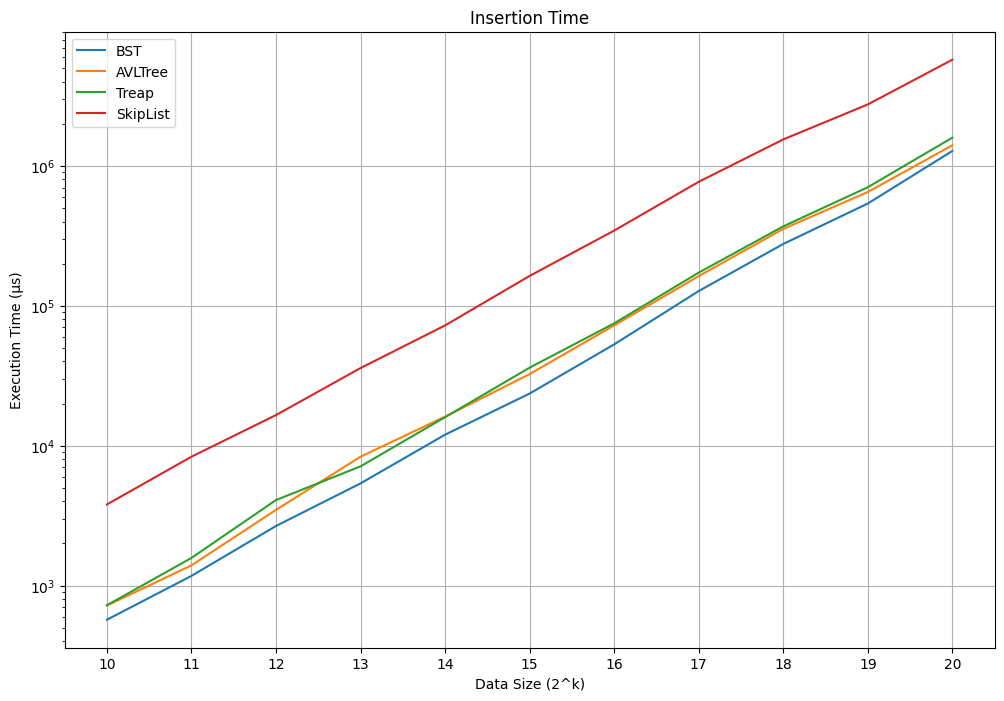

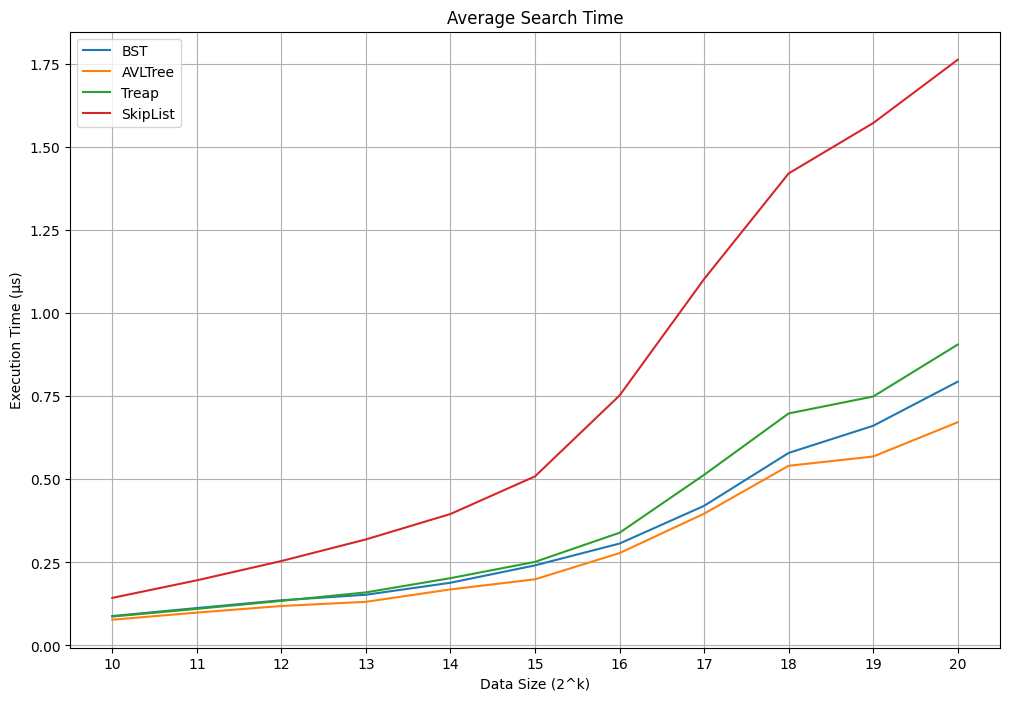

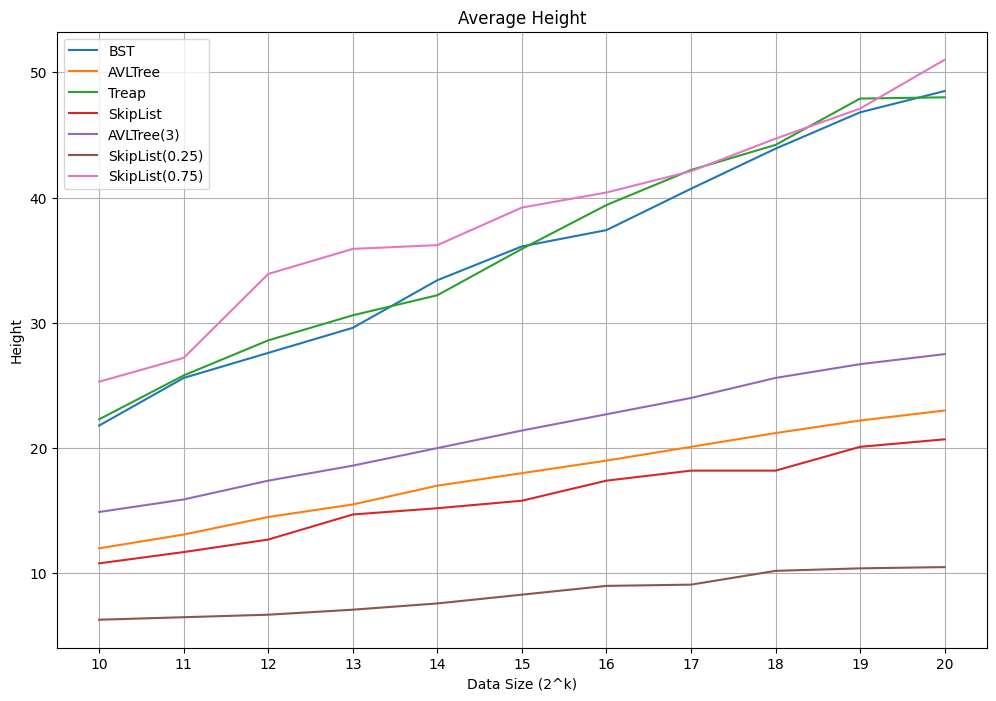

In [2]:
import json
import matplotlib.pyplot as plt
k_range = (10, 20)
x_axis = [i for i in range(k_range[0], k_range[1] + 1)]
EXPERIMENT_ROUND = 10
file_name = f'result_k_{k_range[0]}_{k_range[1]}.json'
data_structure_names = ['BST', 'AVLTree', 'Treap', 'SkipList', 'AVLTree(3)', 'SkipList(0.25)', 'SkipList(0.75)']
experiment_names = ['Insertion Time', 'Average Search Time', 'Average Height']
with open(file_name) as f:
    result_json: dict = json.load(f)
    
result = [[[] for _ in range(7)] for _ in range(3)]
for data_size in x_axis:
    for j, data_structure_name in enumerate(data_structure_names):
        for experiment_number in range(3):
            sum = 0
            elements = 0
            for experiment_round in range(EXPERIMENT_ROUND):
                try:
                    sum += result_json[f'k={str(data_size)}'][f'round={str(experiment_round + 1)}'][data_structure_name][str(experiment_number + 1)]
                    elements += 1
                except KeyError:
                    break
                
            if elements > 0:
                average = sum / elements
                result[experiment_number][j].append(average)


for i, experiment_name in enumerate(experiment_names):
    fig, ax = plt.subplots(figsize=(12, 8))
    for j, data_type in enumerate(data_structure_names):
        if i != 2 and j >= 4:
            break
        ax.plot(x_axis[:len(result[i][j])], result[i][j], label=data_type)
    ax.set_title(experiment_name)
    ax.set_xlabel('Data Size (2^k)')
    match i:
        case 0:
            ax.set_ylabel('Execution Time (μs)')
            ax.set_yscale('log')
        case 1:
            ax.set_ylabel('Execution Time (μs)')
        case 2:
            ax.set_ylabel('Height')
    ax.set_xticks(x_axis)
    ax.grid()
    ax.legend()

    

    

